In [1]:
import $ivy.`org.proml::core:0.1.0`
import proml._
import $ivy.`com.cibo::evilplot-jupyter-scala:0.6.1-SNAPSHOT`
import $ivy.`com.cibo::evilplot-repl:0.6.1-SNAPSHOT`
import com.cibo.evilplot._
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.numeric.Point
import almond.interpreter.api._
import almond.api.helpers.Display.Image
import proml.Model
import proml.distributions.Continuous._
import proml.samplers.MetropolisHastings
import com.cibo.evilplot.geometry.Drawable

val trueA = 2d
val trueB = -2d

val points: Seq[(Double, Double)] = for {
  x     <- -10d to 10d by 0.1
  noise  = normal[Double](0, 1).get
} yield (x * 1.0, trueA * x + trueB + noise)


import $ivy.$                      

import proml._

import $ivy.$                                                

import $ivy.$                                       

import com.cibo.evilplot._

import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.numeric.Point

import almond.interpreter.api._

import almond.api.helpers.Display.png

import proml.Model

import proml.distributions.Continuous._

import proml.samplers.MetropolisHastings

import com.cibo.evilplot.geometry.Drawable


trueA: Double = 2.0
trueB: Double = -2.0
points: Seq[(Double, Double)] = Vector(
  (-10.0, -23.17613779564792),
  (-9.9, -22.8934645134972),
  (-9.8, -21.5898129193474),
  (-9.700000000000001, -23.053533228568053),
  (-9.600000000000001, -21.936285208675823),
  (-9.500000000000002, -19.05746699772733),
  (-9.400000000000002, -20.886935888958803),
  (-9.300000000000002, -19.984983629525622),
  (-9.200000000000003, -19.641164158885477),
  (-9.1000000

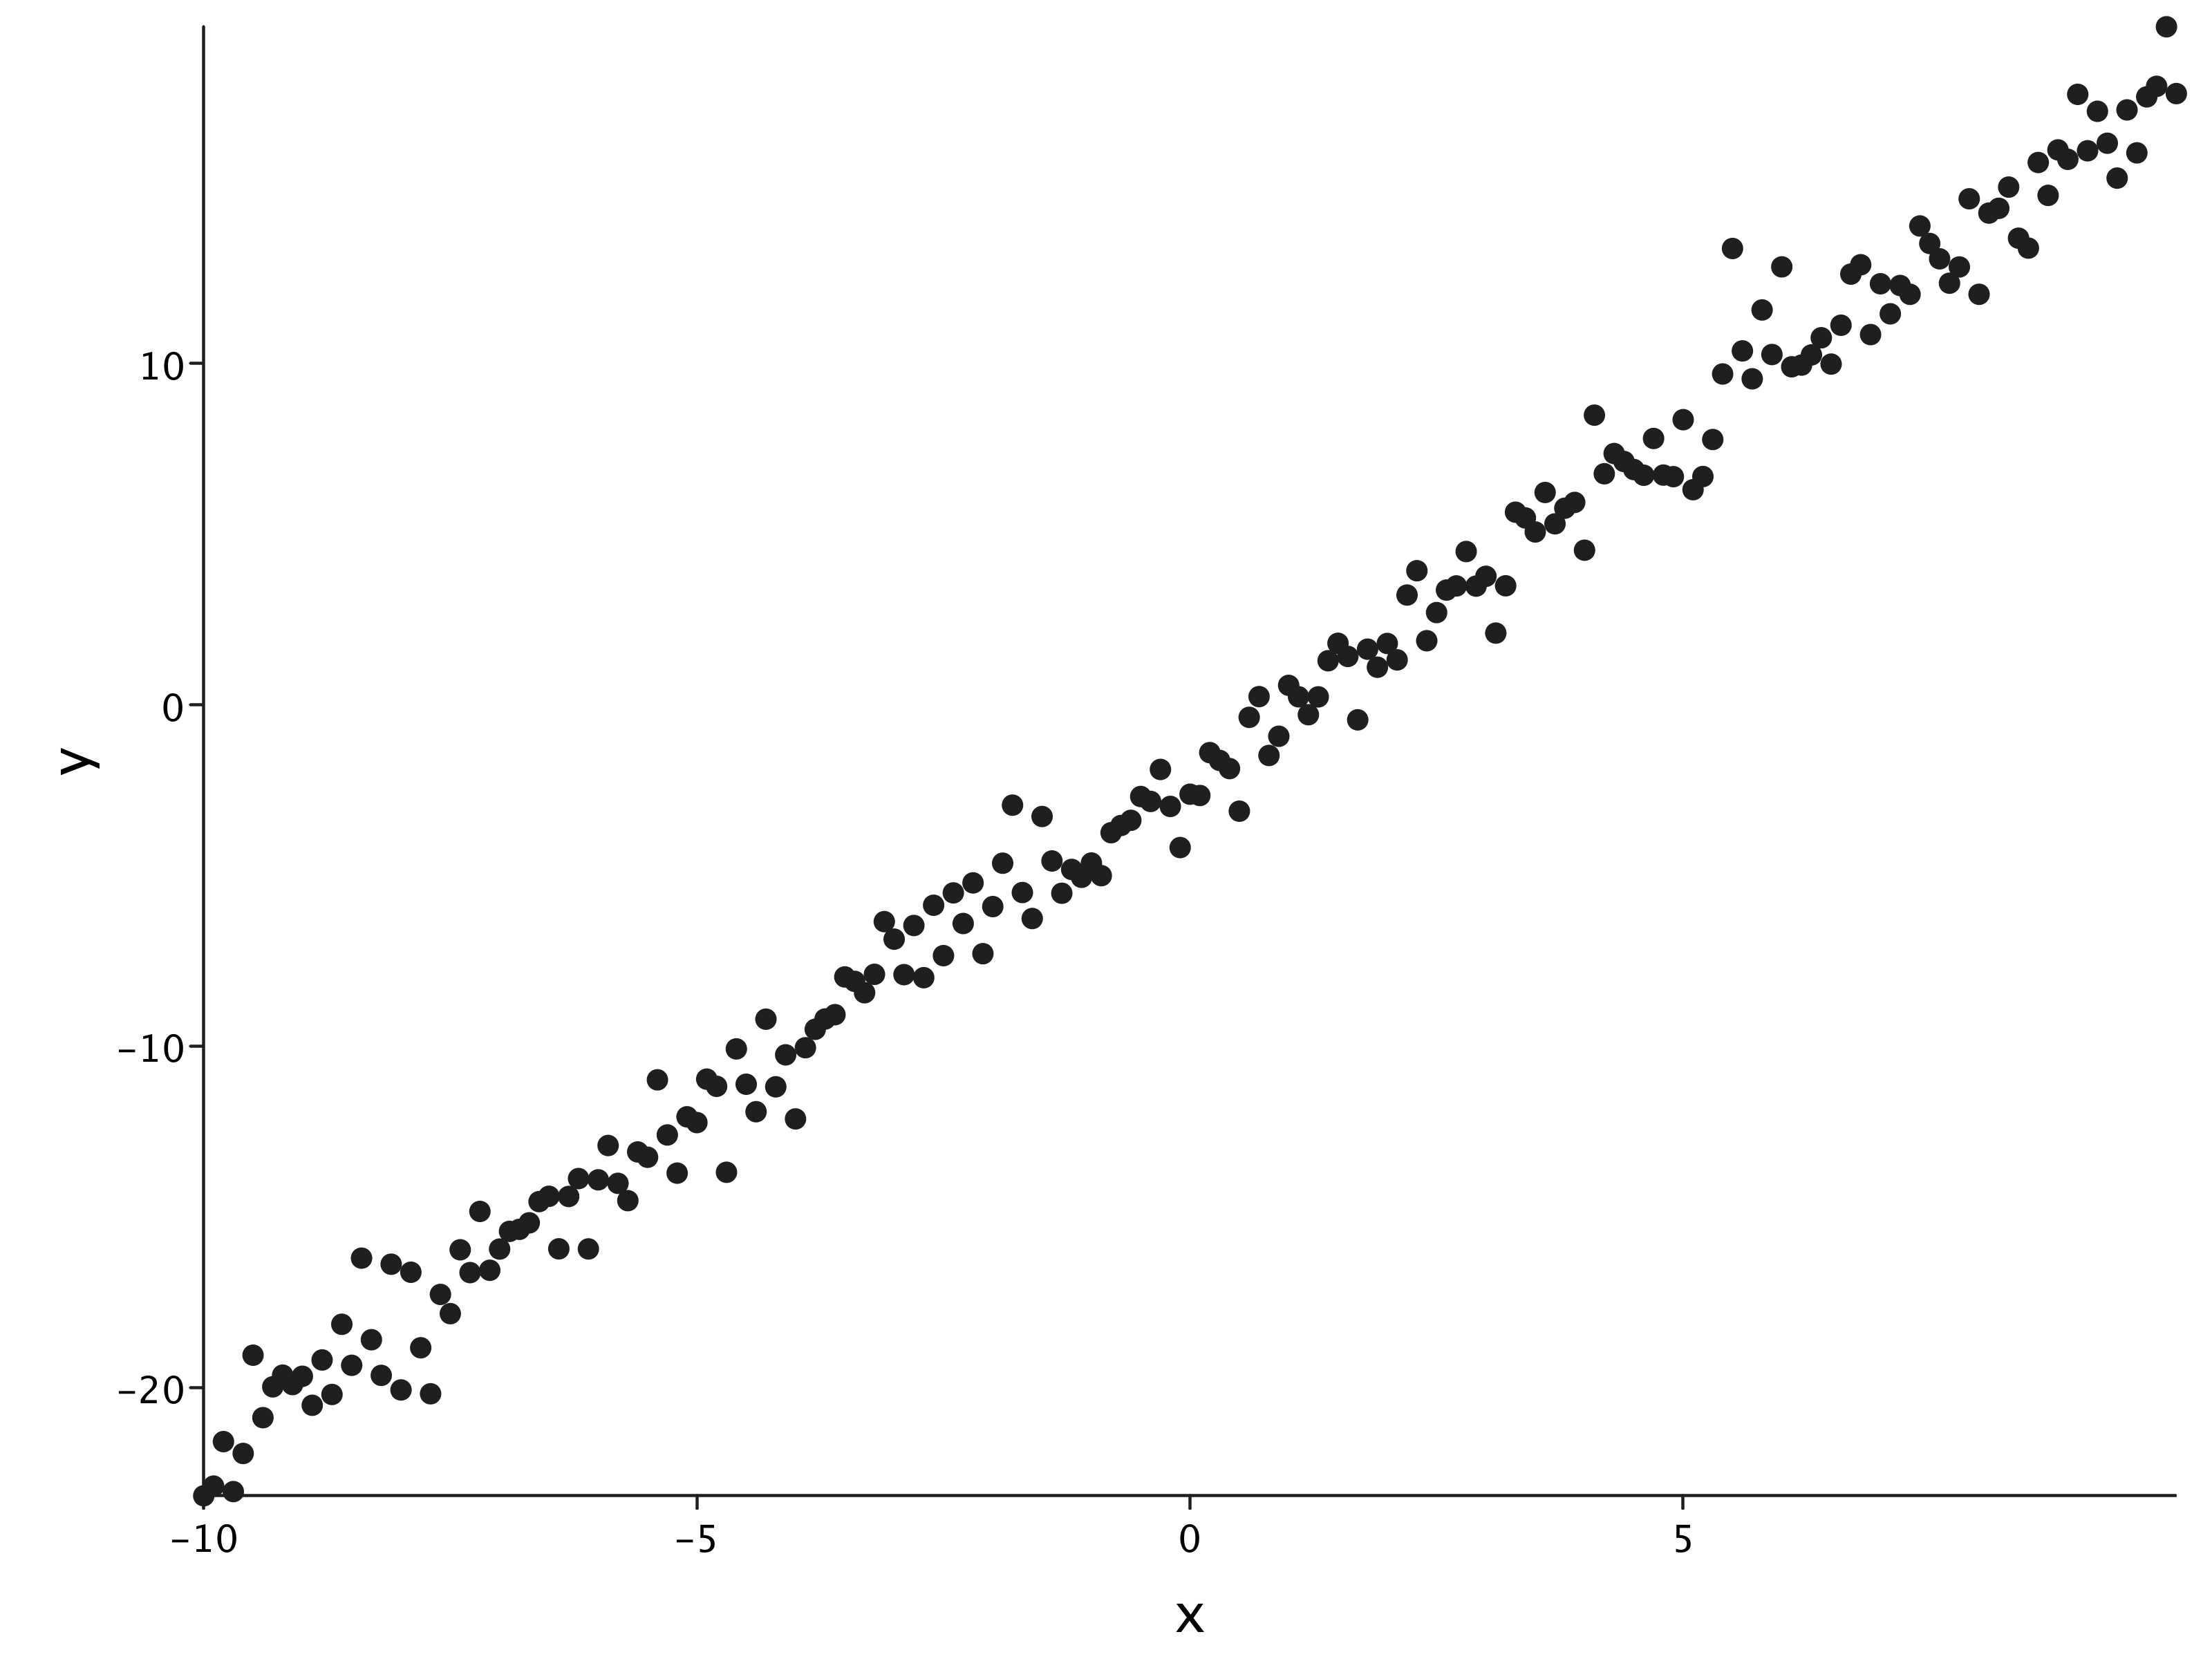

defined function plot
defined function show

In [2]:
def plot(data: Seq[(Double, Double)]) = {
ScatterPlot(
  data.map{p => Point(p._1, p._2)}
).frame()
  .xLabel("x")
  .yLabel("y")
  .frame()
  .xbounds(data.map{_._1}.min, data.map{_._1}.max)
  .ybounds(data.map{_._2}.min, data.map{_._2}.max)
  .xAxis()
  .yAxis()
  .render()
}

def show(drawable: Drawable) {
    import java.io.ByteArrayOutputStream
    import javax.imageio.ImageIO
    val baos = new ByteArrayOutputStream()
    ImageIO.write(drawable.asBufferedImage, "png", baos)
    try{Image.fromArray(baos.toByteArray(), Image.PNG)}
    catch{
      case e: Exception =>  
    }
}

show(plot(points))

In [3]:
 case class Params(amu: Double, bmu: Double)

  val priorAssumption = Params(100, -10)

  def getLogPrior(p: Params): Double = {
    normal[Double](priorAssumption.amu, 1).logPdf(p.amu) +
      normal[Double](priorAssumption.bmu, 1).logPdf(p.bmu)
  }

  def getProposal(prior: Params) =
    for {
      a <- normal[Double](0, 1)
      b <- normal[Double](0, 1)
    } yield Params(a + prior.amu, b + prior.bmu)

  val linearModel = new Model[Params, Double, Double] {
    override def proposal = (p: Params) => getProposal(p).get
    override def logPrior = getLogPrior
    override def model    = (p: Params) => (x: Double) => x * p.amu + p.bmu
    override def prior    = priorAssumption
  }
  val (best, samples) = linearModel.fit(points, MetropolisHastings(20000, 15000))
  println(best)


Params(2.021321561165398,-2.0625065277146337)


defined class Params
priorAssumption: Params = Params(100.0, -10.0)
defined function getLogPrior
defined function getProposal
linearModel: AnyRef with Model[Params, Double, Double] = ammonite.$sess.cmd2$Helper$$anon$1@45ec087c
best: Params = Params(2.021321561165398, -2.0625065277146337)
samples: Seq[Params] = List(
  Params(1.0198701226362392, -1.2718195620879174),
  Params(2.5155536367989146, -3.0344030534243513),
  Params(1.9446042884064487, -2.359527113834615),
  Params(1.1416870212655592, -0.523135763874055),
  Params(1.520383478225285, -1.7683672067214482),
  Params(2.6071943899703136, -2.6989175738203475),
  Params(1.2138340443747158, -1.5937553698014315),
  Params(3.160218355967248, -1.0466450063039594),
  Params(1.7626365224961988, -1.50541618108489),
  Params(2.9833825774186264, -0.7001948743262847),
  Params(3.4118595770323616, -3.242006761454251),
  Params(0.7878746983549199, -0.8089654581509926),
  Params(1.9009615761331635, -0.6858592022159387),
  Params(2.080197035004780

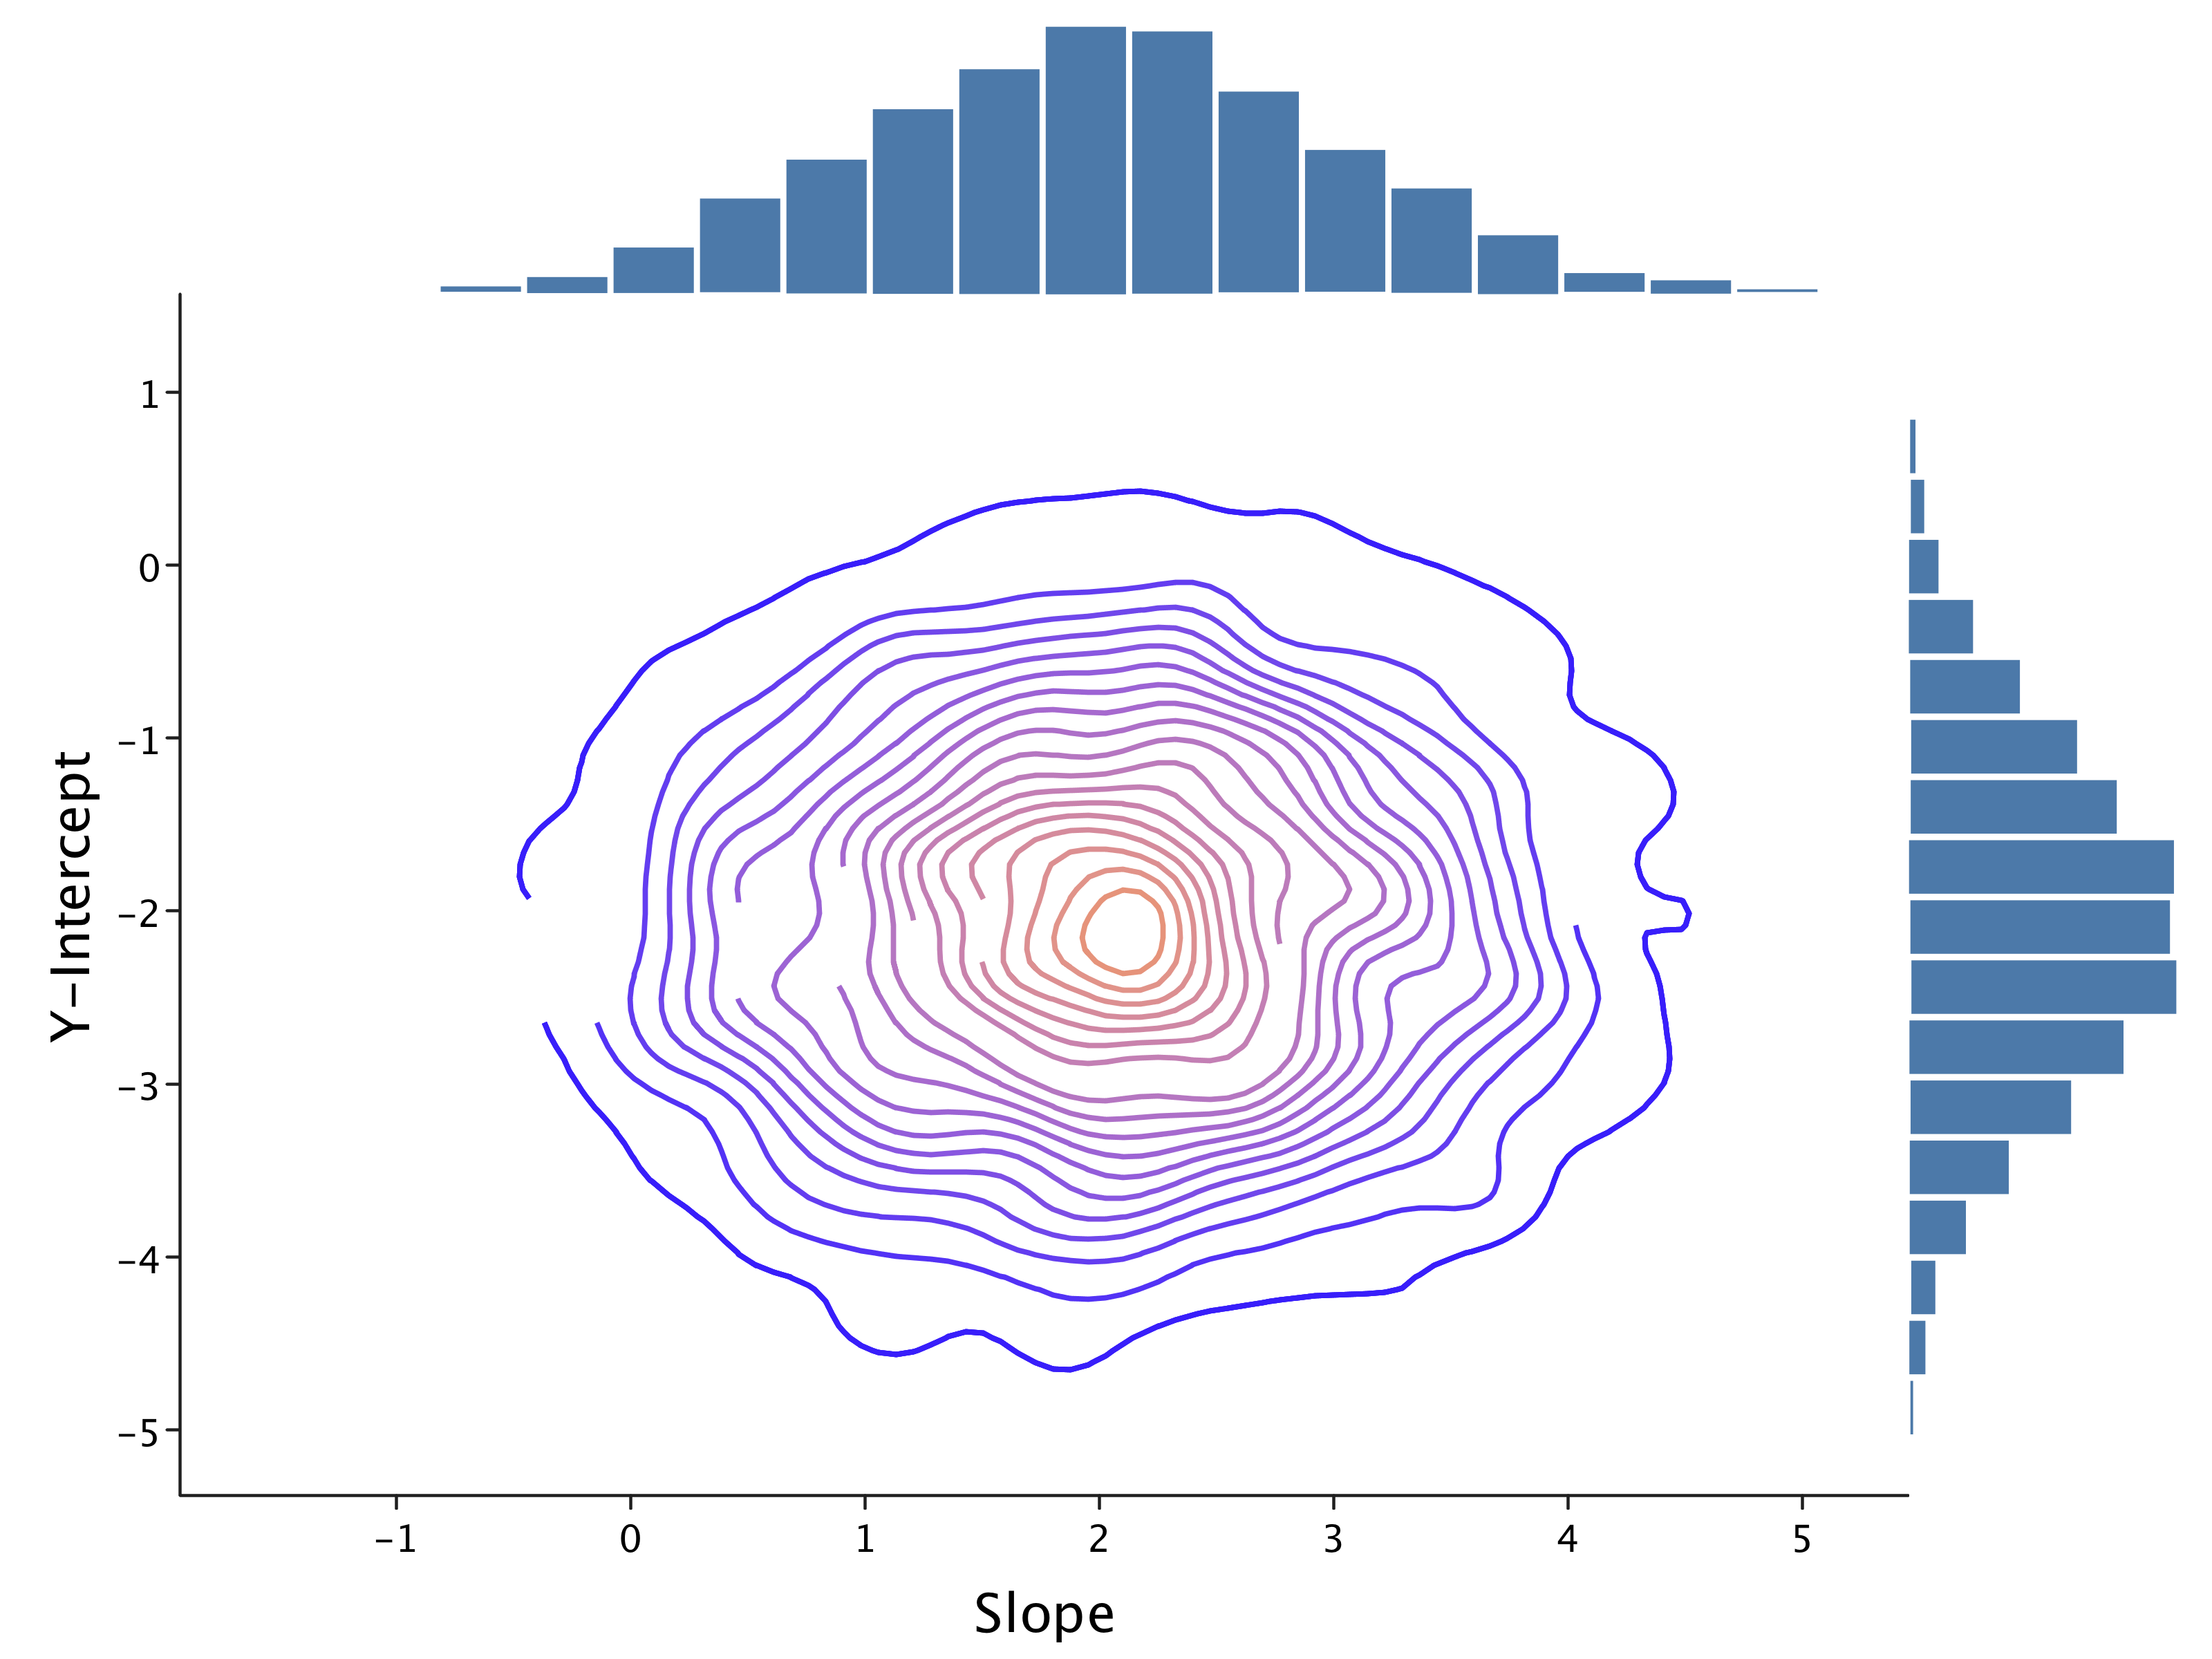

defined function cplot

In [4]:
def cplot(data: Seq[(Double, Double)]) = {
   ContourPlot(
      data.map{p => Point(p._1, p._2)}
    ).frame()
      .xLabel("Slope")
      .yLabel("Y-Intercept")
      .xbounds(data.map{_._1}.min, data.map{_._1}.max)
      .ybounds(data.map{_._2}.min, data.map{_._2}.max)
      .xAxis()
      .yAxis()
      .topPlot(Histogram(data.map{_._1}), 100)
      .rightPlot(Histogram(data.map{_._2}), 100)
      .render()
}

show(cplot(samples.map(s => (s.amu, s.bmu))))